<a id="toc"></a>

# 📓 Notebook 02 – Outils et Visualisations DR5

> But. Ce notebook regroupe des outils interactifs pour explorer, diagnostiquer et affiner les spectres téléchargés du catalogue LAMOST DR5, sans relancer le pipeline complet.  
Usage. Chaque section explique à quoi ça sert, comment l’utiliser et ce qui est sauvegardé dans les dossiers de logs.

Sommaire rapide
- [🛠️ Setup & Imports](#setup)
- [📊 Tableau de Bord de l’État du Dataset](#dashboard)
- [🔭 Explorateur de Header FITS](#fits)
- [🎚️ Tuning Interactif des Raies](#tuning)
- [🧪 Analyse des Features Nulles](#nulls)
- [🗺️ Carte de Couverture Céleste](#sky)
- [🧠 Inspecteur de Modèles Entraînés](#inspector)
- [🧬 Comparateur de Spectres Interactif](#compare-spectra)
- [🧼 Comparateur de Normalisation](#compare-norm)
- [🛰️ Analyse d’Interprétabilité (SHAP)](#shap)
- [🏷️ Distribution des Sous-Classes](#subclasses)
- [🔎 Analyse en Profondeur des Features](#deep-features)

#

<a id="setup"></a>
# 🛠️ Setup & Imports [↩︎](#toc)

Initialise l’environnement de travail (détection automatique de la racine du projet, ajout de ``src/`` au ``sys.path``) et charge :

- ``AstroVisualizer`` : l’interface principale d’outils,

- ``setup_project_env()`` : chemins & constantes (raw, catalog, models, logs…),

- utilitaires du **pipeline** (si besoin de recharger un modèle).

**Résultat attendu :** message “Setup terminé. Les outils de visualisation sont prêts.” et un objet ``visualizer``.

In [1]:
# --- Imports des librairies externes ---
import os

# --- Imports de la librairie "astrospectro" ---
from utils import setup_project_env
from tools.visualizer import AstroVisualizer

# --- Initialisation ---
paths = setup_project_env()
visualizer = AstroVisualizer(paths)

print("\nSetup terminé. Les outils de visualisation sont prêts.")

[INFO] Racine du projet détectée : C:\Users\alexb\Documents\Projets\AstroSpectro
[INFO] Dossier 'src' ajouté au sys.path.
AstroVisualizer initialisé. Les modèles seront chargés à la demande.
  > Catalogue de 99999 labels chargé pour l'affichage.

Setup terminé. Les outils de visualisation sont prêts.


#

<a id="dashboard"></a>
# 📊 Tableau de Bord de l’État du Dataset [↩︎](#toc)


Mini-dashboard pour suivre la progression du dataset :

1. **Inventaire des fichiers :** compte les ``*.fits.gz`` dans ``data/raw/``.
2. **Fichiers utilisés :** lit ``trained_spectra.csv`` (si présent) et comptabilise les spectres déjà utilisés.
3. **Aide au debug :** extrait la fin du log en cas d’erreur récente.

> **Astuce.** Idéal avant un nouveau batch de téléchargement/traitement pour vérifier que tout est OK.

In [2]:
visualizer.display_dataset_dashboard()

### Tableau de Bord du Dataset Spectral

Ce panneau donne un aperçu rapide de votre collection de spectres et met en évidence d’éventuelles opportunités de nouveaux entraînements.

metric,# value
total_available,227 009
total_trained,109 998
total_new_candidates,117 011
distinct_subclasses,0
distinct_plans,107


#### Spectres par plan (top 20)

plan_id,# count
GAC_045N28_B1,5 852
M31_021N30_B1,4 038
GAC_105N29_B1,3 885
GAC_113N28_B1,3 185
GAC_107N27_B1,3 144
B90304,3 128
M31_011N40_B1,3 061
B9002,3 061
GAC_089N28_B1,3 058
GAC_060N28_B1,3 044


,metric,# value
0,total_available,227009
1,total_trained,109998
2,total_new_candidates,117011
3,distinct_subclasses,0
4,distinct_plans,107


#

<a id="fits"></a>
# 🔭 Explorateur de Header FITS [↩︎](#toc)


Outil interactif pour ouvrir un spectre compressé (``.fits.gz``) et afficher les métadonnées structurées.

**Utilisations typiques**

- Contrôle qualité (coordonnées, type d’objet, seeing, date, filtre, etc.).
- Debug ciblé d’un spectre “bizarre”.
- Détection de valeurs aberrantes avant un run massif.

> **Tip**. Compatible ``astropy.io.fits`` avec fichiers gzip — tu peux ouvrir directement depuis ``data/raw/``.

In [ ]:
visualizer.interactive_header_explorer()

#

<a id="tuning"></a>
# 🎚️ Tuning Interactif des Raies [↩︎](#toc)


Ajuste en direct les hyper-paramètres de détection de raies :

- **Prominence :** hauteur minimale,
- **Fenêtre :** largeur de la zone glissante autour du pic.

**Objectif.** Tester visuellement l’impact des réglages et valider avant de relancer une détection globale.

> **Bon réflexe.** Sauvegarde un screenshot du spectre “avant/après” quand un réglage te semble optimal.

In [ ]:
visualizer.interactive_peak_tuner()

--- 
## Analyseur de Spectre Augmenté

Cet outil tout-en-un vous permet de visualiser un spectre, d'ajuster les paramètres de détection de pics en temps réel, et d'évaluer la qualité des données et de l'analyse.

interactive(children=(Dropdown(description='Spectre :', layout=Layout(width='max-content'), options=('B6001/sp…

#

<a id="nulls"></a>
# 🧪 Analyse des Features Nulles [↩︎](#toc)


Analyse la qualité des features extraites du dernier run :

- Histogramme des colonnes avec trop de 0.0 ou de NaN,
- Top des colonnes les plus manquantes,
- Indicateurs simples (compte, min, max…).

> **Quand l’utiliser ?** Juste après un batch d’extraction pour repérer les features à exclure/renommer/fixer.

In [ ]:
visualizer.analyze_feature_zeros()

#

<a id="sky"></a>
# 🗺️ Carte de Couverture Céleste [↩︎](#toc)


Affiche une **projection Mollweide** des plans d’observation présents dans les fichiers téléchargés.

- Visualise les **zones du ciel** couvertes (trous/chevauchements),
- Utile pour détecter des **biais géographiques** (ex. hémisphère, bande galactique).

--- 
## Carte de Couverture Céleste

Cette carte montre la position des plans d'observation que tu as téléchargés. La taille et la couleur des points indiquent le nombre de spectres par plan.

  > Des FITS plus récents que le cache — régénération…
  > Scan des fichiers FITS pour générer le catalogue de position…


Lecture des headers:   0%|          | 0/227009 [00:00<?, ?it/s]

  > Catalogue de position créé avec 107 plan(s) unique(s).  [2 entrée(s) ignorée(s)]
  > Carte de couverture sauvegardée : C:\Users\alexb\Documents\Projets\AstroSpectro\logs\sky_coverage_20260112T173144Z.png


(<Figure size 2000x1000 with 2 Axes>,
 <MollweideAxes: title={'center': 'Carte de Couverture Céleste (plans DRS — centroïdes RA/Dec)'}>)

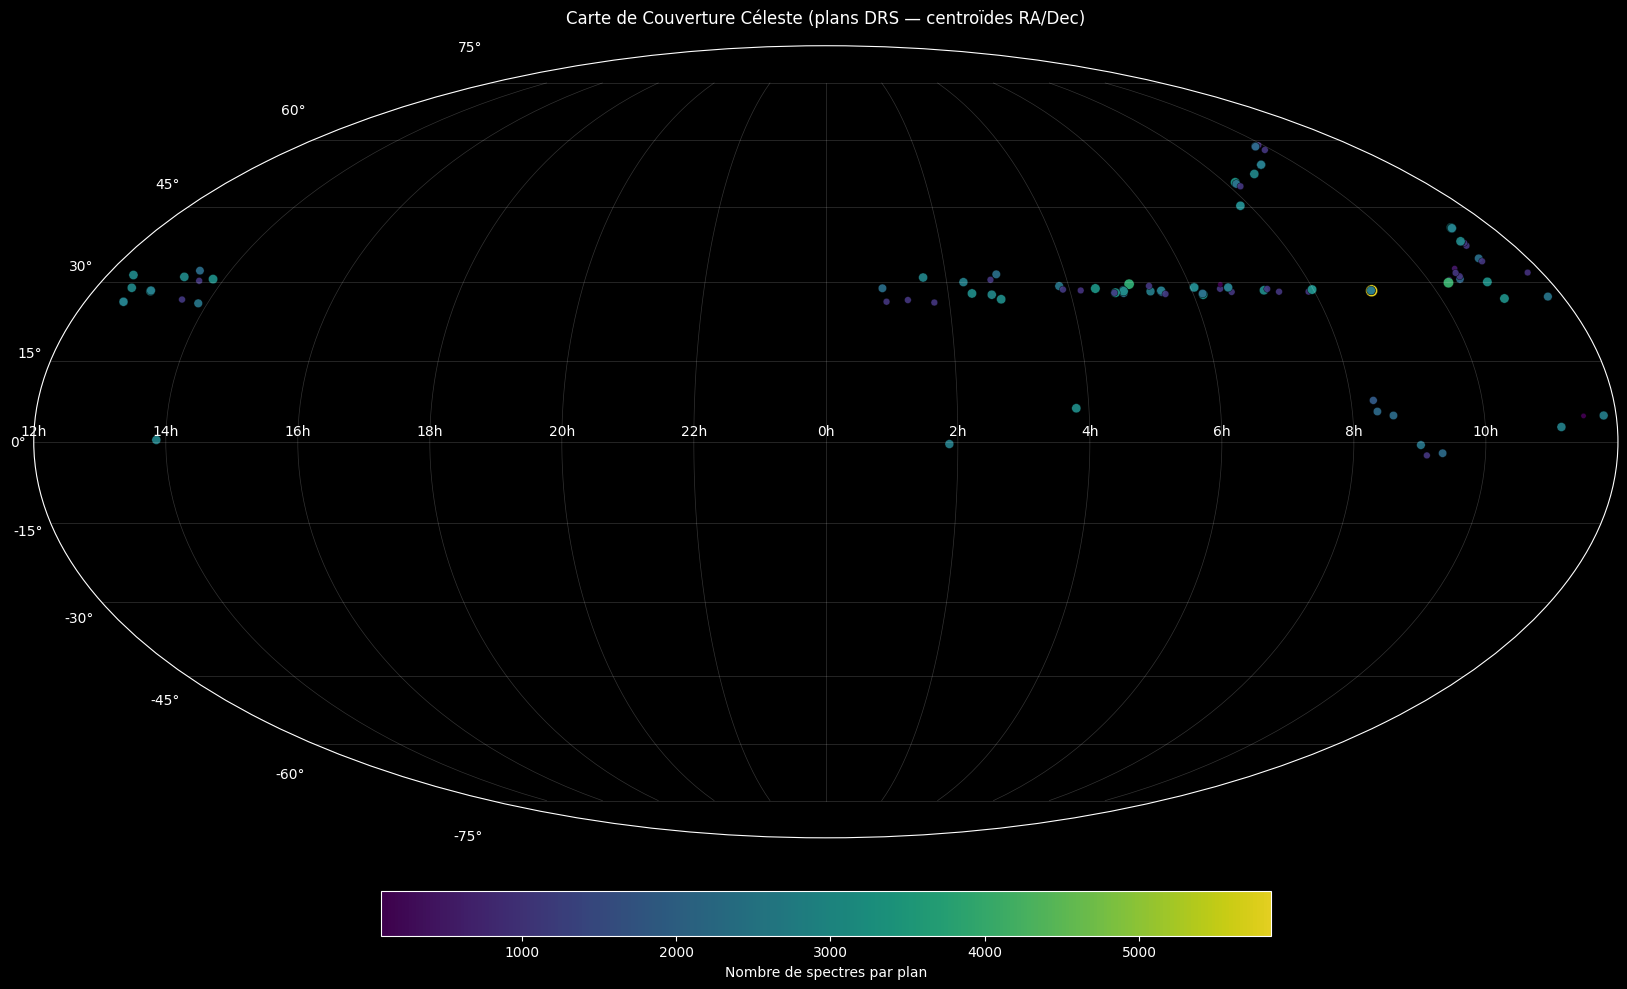

In [4]:
visualizer.plot_sky_coverage()

#

<a id="inspector"></a>
# 🧠 Inspecteur de Modèles Entraînés [↩︎](#toc)


Charge un modèle ``.pkl`` (menu déroulant) et affiche :

- **Les hyper-paramètres,**
- La **feature importance** du classifieur (triée).

> **À faire régulièrement.** Vérifier que les features dominantes restent cohérentes avec la physique (pas d’artéfact).

In [ ]:
visualizer.interactive_model_inspector()

#

<a id="compare-spectra"></a>
# 🧬 Comparateur de Spectres Interactif [↩︎](#toc)


Superpose plusieurs spectres sur un même graphique pour une comparaison détaillée.

**Cas d’usage**

- **Même type :** comparer des étoiles d’un même type (variations fines),
- **Types différents :** A vs M, etc.,
- **Évolution temporelle :** suivre une étoile variable (multi-époques).

**Contrôles**

1. Sélection multiple (Ctrl/Cmd ou Shift).
2. Option “**Normaliser les spectres**” (recommandé).
3. Slider **Décalage Y** pour éviter le chevauchement.

In [ ]:
visualizer.interactive_spectra_comparator()

#

<a id="compare-norm"></a>
# 🧼 Comparateur de Normalisation [↩︎](#toc)


Génère une figure **Avant / Après** normalisation sur 2 spectres choisis au hasard (ou spécifiques si tu adaptes la cellule).

- Panneau haut : **brut**
- Panneau bas : **normalisé**
- Sauvegarde automatique dans ``website/static/img/`` (chemin projet)

In [ ]:
visualizer.plot_normalization_comparison()

#

<a id="shap"></a>
# 🛰️ Analyse d’Interprétabilité (SHAP) [↩︎](#toc)


Interface pour **tester un modèle entraîné** et visualiser l’influence des features.

**Étapes**

1. Choisir un ``.pkl`` dans ``data/models/``.
2. Régler **Échantillons** (nombre de spectres utilisés).
3. Lancer **Analyser**.

**Sorties**

- Tableau **mean(|SHAP|)** trié (Top N configurable),
- Exports auto dans ``logs/shap/`` :
    - ``shap_importances_<timestamp>.csv``
    - ``shap_importances_<timestamp>.tex``

In [ ]:
visualizer.interactive_shap_explainer()

### Après l’analyse (optionnel) tu peux tracer :

> Interprétation rapide. Plus mean(|SHAP|) est grand, plus la feature impacte le score du modèle (tous labels confondus).

In [ ]:
from datetime import datetime, timezone
ts = datetime.now(timezone.utc).strftime("%Y%m%dT%H%M%SZ")
out_dir = os.path.join(visualizer.paths["LOGS_DIR"], "shap"); os.makedirs(out_dir, exist_ok=True)

visualizer.plot_shap_summary_bar(top_n=25, save_path=os.path.join(out_dir, f"shap_bar_{ts}.png"))
visualizer.plot_shap_beeswarm(max_display=20, save_path=os.path.join(out_dir, f"shap_beeswarm_{ts}.png"))

#

<a id="subclasses"></a>
# 🏷️ Distribution des Sous-Classes [↩︎](#toc)


Histogramme des **labels** (top-N configurable, ``%`` si ``normalize=True``).
Permet de voir en un coup d’œil les **déséquilibres de classes**.

In [ ]:
visualizer.plot_subclass_distribution(top_n=25, normalize=True)

<br/>

<a id="deep-features"></a>
# 🔎 Analyse en Profondeur des Features [↩︎](#toc)


Pipeline **EDA → Corrélations → RandomForest → Permutation** Importance, avec **exports** dans ``logs/features/``.

**Paramètres importants**

- ``pattern`` : motif de chargement (par défaut ``data/processed/features_*.csv``),
- ``m``ax_hists : nb de distributions tracées (triées par variance),
- ``corr_top_n : taille de la heatmap de corrélation (top variance),
- ``rf_estimators`` / ``random_state`` : RF pour importance “impurity-based”,
- ``do_permutation=True`` : importance de permutation sur split validation.

**Sorties**

- Résumé global (nb lignes/colonnes, taux de missing),
- **Top colonnes manquantes**,
- Stats descriptives (numériques),
- Distributions (top variance),
- **Heatmap de corrélation**,
- Importances **RF** et **Permutation** (tables + PNG).

> **Note (split stratifié)**. Si certaines classes sont **trop rares**, la stratification est automatiquement **désactivée** (message dans la cellule). Ajoute des exemples ou fusionne des classes pour réactiver le split stratifié.

In [ ]:
summary = visualizer.feature_explorer(
    pattern=None,
    save_dir=None,
    max_hists=24,
    corr_top_n=30,
    rf_estimators=400,
    random_state=42,
    do_permutation=True,
)

# Re-tracer un bar chart des importances RF (si besoin, avec un autre top N)
visualizer._plot_feature_importances_bar(
    top_n=40,
    save_path=os.path.join(summary["save_dir"], "rf_importances_top40.png"))

#
#
#


In [7]:
# === HR/RPM notebook helpers ===================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone

# (Optionnel) si tu veux sauvegarder dans data/reports/ automatiquement :
try:
    from utils import setup_project_env, ensure_dir, utc_now_tag
    PATHS = setup_project_env(create_missing_dirs=True, verbose=False)
    REPORTS_DIR = PATHS["REPORTS_DIR"]
except Exception:
    REPORTS_DIR = "."

def _utc_tag():
    try:
        return utc_now_tag()
    except Exception:
        return datetime.now(timezone.utc).strftime("%Y%m%dT%H%M%SZ")

def _pick_col(df: pd.DataFrame, prefer, fallback=()):
    """Retourne la 1re colonne existante dans `prefer` puis `fallback`, ou None."""
    for c in prefer:
        if c in df.columns:
            return c
    for c in fallback:
        if c in df.columns:
            return c
    return None

def _quality_mask(df: pd.DataFrame, ruwe_col=None, snr_col=None, ruwe_max=1.4, snr_min=5):
    mask = pd.Series(True, index=df.index)
    if snr_col and snr_col in df.columns:
        mask &= df[snr_col].fillna(0) >= snr_min
    if ruwe_col and ruwe_col in df.columns:
        if ruwe_col == "is_good_ruwe":
            mask &= (df[ruwe_col] == 1)
        else:
            mask &= df[ruwe_col].fillna(10) < ruwe_max
    return mask

def _auto_cols_for_cmd(df: pd.DataFrame):
    """Détecte bp_rp & M_G (versions corrigées si présentes)."""
    color = _pick_col(df, ["bp_rp0", "bp_rp"])
    M_G   = _pick_col(df, ["M_G0", "M_G", "M_G_dist", "M_G_parallax"])
    ruwe  = _pick_col(df, ["ruwe", "is_good_ruwe"])
    snr   = _pick_col(df, ["parallax_snr"])
    klass = _pick_col(df, ["subclass", "main_class", "class"])
    return dict(color=color, M_G=M_G, ruwe=ruwe, snr=snr, klass=klass)

def _auto_cols_for_rpm(df: pd.DataFrame):
    """Détecte bp_rp & H_G pour RPM."""
    color = _pick_col(df, ["bp_rp0", "bp_rp"])
    H_G   = _pick_col(df, ["H_G"])
    klass = _pick_col(df, ["subclass", "main_class", "class"])
    return dict(color=color, H_G=H_G, klass=klass)


In [8]:
def plot_cmd(
    df: pd.DataFrame,
    *,
    color_col: str | None = None,
    M_G_col: str | None = None,
    ruwe_col: str | None = None,
    snr_col: str | None = None,
    hue: str | None = None,
    max_points: int = 80000,
    s: float = 6.0,
    alpha: float = 0.4,
    title: str | None = None,
    save_path: str | None = None,
):
    """
    Color–Magnitude Diagram (Gaia-like). Inverse l'axe Y (magnitudes).
    - Autodétecte les colonnes si non spécifiées.
    - Applique RUWE et SNR parallaxe si fournis.
    - Peut colorer par une colonne catégorielle (ex. 'subclass').

    Retourne: (fig, ax, used_df, cols_dict)
    """
    auto = _auto_cols_for_cmd(df)
    color_col = color_col or auto["color"]
    M_G_col   = M_G_col or auto["M_G"]
    ruwe_col  = ruwe_col or auto["ruwe"]
    snr_col   = snr_col or auto["snr"]
    hue       = hue or auto["klass"]

    if not color_col or not M_G_col:
        raise ValueError(f"Colonnes nécessaires introuvables. Trouvées: {auto}")

    mask = _quality_mask(df, ruwe_col=ruwe_col, snr_col=snr_col)
    work = df[mask].copy()
    work = work[work[color_col].notna() & work[M_G_col].notna()]

    # Échantillonnage si dataset massif
    if len(work) > max_points:
        work = work.sample(max_points, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 9))

    if hue and hue in work.columns:
        cats = work[hue].astype(str).fillna("NA")
        codes, uniques = pd.factorize(cats, sort=True)
        sc = ax.scatter(work[color_col], work[M_G_col], c=codes, s=s, alpha=alpha, cmap="tab20")
        # petite légende compacte (max ~20 classes pour éviter la surcharge)
        max_leg = min(len(uniques), 20)
        handles = [plt.Line2D([], [], marker="o", linestyle="", label=str(uniques[i])) for i in range(max_leg)]
        ax.legend(handles=handles, labels=[str(uniques[i]) for i in range(max_leg)],
                  title=hue, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.)
    else:
        ax.scatter(work[color_col], work[M_G_col], s=s, alpha=alpha)

    ax.invert_yaxis()
    ax.set_xlabel(f"{color_col} (mag)")
    ax.set_ylabel(f"{M_G_col} (mag)")
    if not title:
        title = f"Color–Magnitude Diagram  |  N={len(work)}"
    ax.set_title(title)

    plt.tight_layout()

    if save_path is None:
        save_path = f"{REPORTS_DIR}/cmd_{_utc_tag()}.png"
    fig.savefig(save_path, dpi=180, bbox_inches="tight")
    print(f"[CMD] Sauvegardé → {save_path}")

    return fig, ax, work, dict(color=color_col, M_G=M_G_col, ruwe=ruwe_col, snr=snr_col, hue=hue)


def plot_rpm(
    df: pd.DataFrame,
    *,
    color_col: str | None = None,
    H_G_col: str | None = None,
    hue: str | None = None,
    max_points: int = 80000,
    s: float = 6.0,
    alpha: float = 0.4,
    title: str | None = None,
    save_path: str | None = None,
):
    """
    Reduced Proper Motion diagram (H_G vs couleur). Inverse Y comme un CMD.
    Retourne: (fig, ax, used_df, cols_dict)
    """
    auto = _auto_cols_for_rpm(df)
    color_col = color_col or auto["color"]
    H_G_col   = H_G_col  or auto["H_G"]
    hue       = hue or auto["klass"]

    if not color_col or not H_G_col:
        raise ValueError(f"Colonnes nécessaires introuvables. Trouvées: {auto}")

    work = df.copy()
    work = work[work[color_col].notna() & work[H_G_col].notna()]
    if len(work) > max_points:
        work = work.sample(max_points, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 9))

    if hue and hue in work.columns:
        cats = work[hue].astype(str).fillna("NA")
        codes, uniques = pd.factorize(cats, sort=True)
        sc = ax.scatter(work[color_col], work[H_G_col], c=codes, s=s, alpha=alpha, cmap="tab20")
        max_leg = min(len(uniques), 20)
        handles = [plt.Line2D([], [], marker="o", linestyle="", label=str(uniques[i])) for i in range(max_leg)]
        ax.legend(handles=handles, labels=[str(uniques[i]) for i in range(max_leg)],
                  title=hue, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.)
    else:
        ax.scatter(work[color_col], work[H_G_col], s=s, alpha=alpha)

    ax.invert_yaxis()
    ax.set_xlabel(f"{color_col} (mag)")
    ax.set_ylabel(f"{H_G_col} (mag)")
    if not title:
        title = f"Reduced Proper Motion Diagram  |  N={len(work)}"
    ax.set_title(title)

    plt.tight_layout()

    if save_path is None:
        save_path = f"{REPORTS_DIR}/rpm_{_utc_tag()}.png"
    fig.savefig(save_path, dpi=180, bbox_inches="tight")
    print(f"[RPM] Sauvegardé → {save_path}")

    return fig, ax, work, dict(color=color_col, H_G=H_G_col, hue=hue)


[CMD] Sauvegardé → C:\Users\alexb\Documents\Projets\AstroSpectro\data\reports/cmd_20260112T174055Z.png
Colonnes CMD utilisées: {'color': 'bp_rp0', 'M_G': 'M_G0', 'ruwe': 'ruwe', 'snr': 'parallax_snr', 'hue': 'subclass'}
[RPM] Sauvegardé → C:\Users\alexb\Documents\Projets\AstroSpectro\data\reports/rpm_20260112T174056Z.png
Colonnes RPM utilisées: {'color': 'bp_rp0', 'H_G': 'H_G', 'hue': 'subclass'}


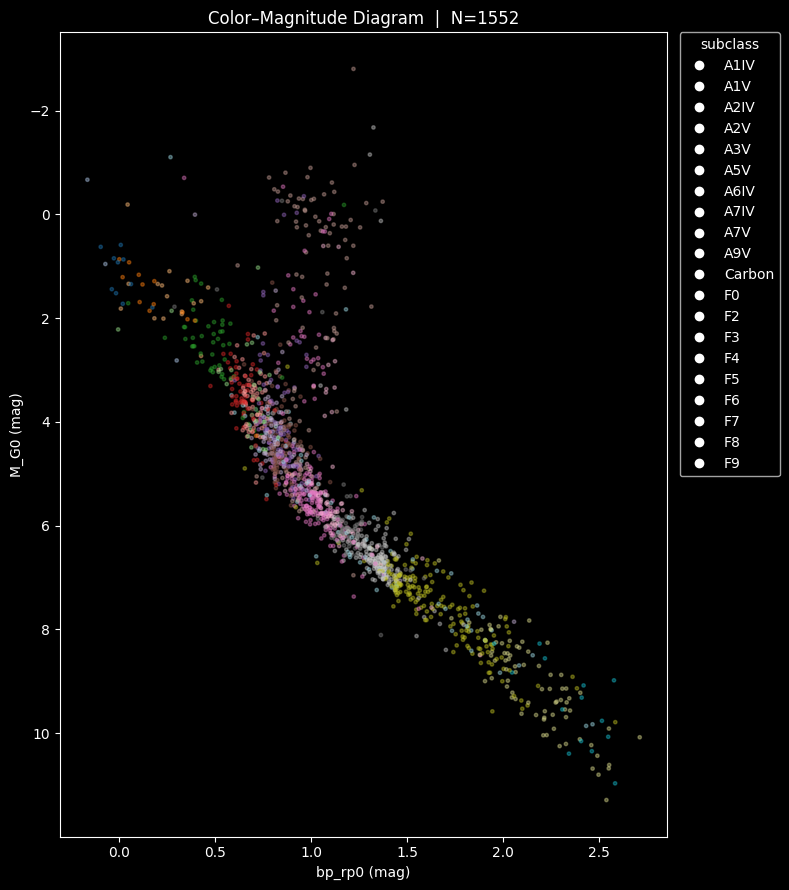

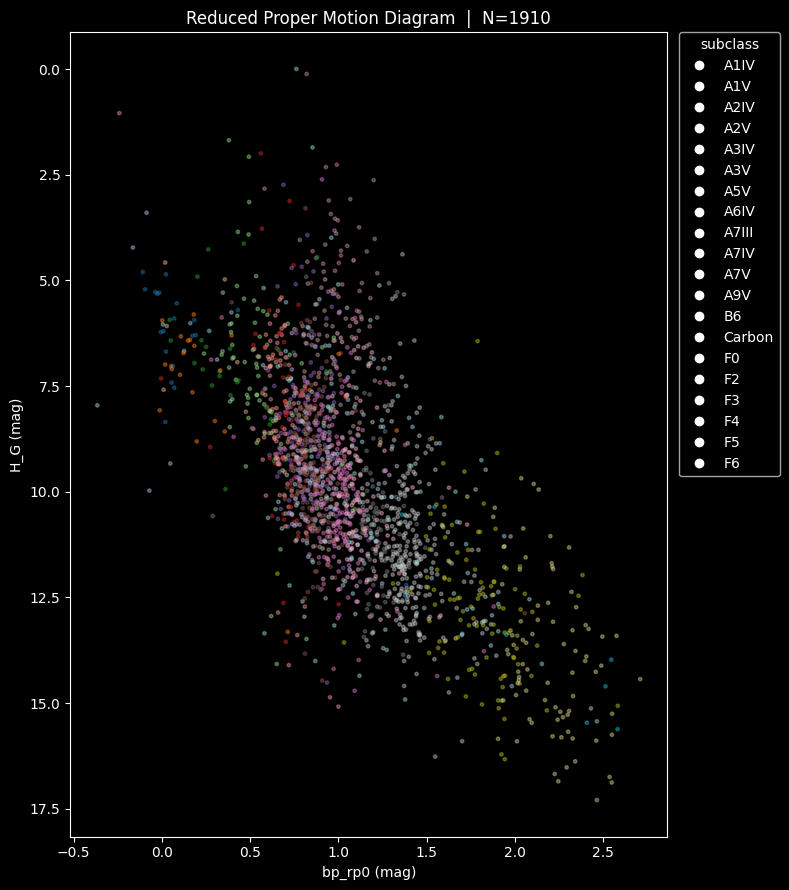

In [9]:
# Chemin vers ton fichier (met le tien ici)
csv_path = "../data/processed/features_20250825T235455Z.csv"  # ou ton dernier features_*.csv
df = pd.read_csv(csv_path)

# HR (CMD) — couleur par sous-classe si dispo
_, _, df_cmd, cols_cmd = plot_cmd(
    df,
    hue="subclass",           # auto-retombe si la colonne n’existe pas
    max_points=50000,         # échantillonnage pour rester fluide
)
print("Colonnes CMD utilisées:", cols_cmd)

# RPM — couleur par sous-classe si dispo
_, _, df_rpm, cols_rpm = plot_rpm(
    df,
    hue="subclass",
    max_points=50000,
)
print("Colonnes RPM utilisées:", cols_rpm)
